In [8]:
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
import os

def plot_lightcurve(filename):
    """
    Plots a light curve from a CSV or ECSV file.

    Args:
        filename (str): Path to the file.
    """
    try:
        # Determine file format and expected columns
        if filename.lower().endswith(".ecsv"):
            format = "ascii.ecsv"
            x_col = 'jd'
            y_col = 'flux'
            plot_type = "Raw"
            x_label = "Julian Date (JD)"
        elif filename.lower().endswith(".csv"):
            format = "csv"
            x_col = 'phase'
            y_col = 'normalized_flux'
            plot_type = "Folded"
            x_label = "Phase"
        else:
            raise ValueError("Unsupported file format. Only CSV and ECSV are supported.")

        table = Table.read(filename, format=format)

        if x_col not in table.colnames or y_col not in table.colnames:
            raise ValueError(f"Input file must contain '{x_col}' and '{y_col}' columns.")

        x = table[x_col]
        y = table[y_col]

        plt.figure(figsize=(10, 6))
        plt.plot(x, y, marker='.', linestyle='-', markersize=2 if plot_type=="Raw" else 5) # smaller markersize for raw
        plt.xlabel(x_label)
        plt.ylabel(y_col.capitalize())
        plt.title(f"{plot_type} Light Curve: {os.path.basename(filename)}")
        plt.grid(True)
        plt.show()

    except FileNotFoundError:
        print(f"Error: File not found: {filename}")
    except ValueError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

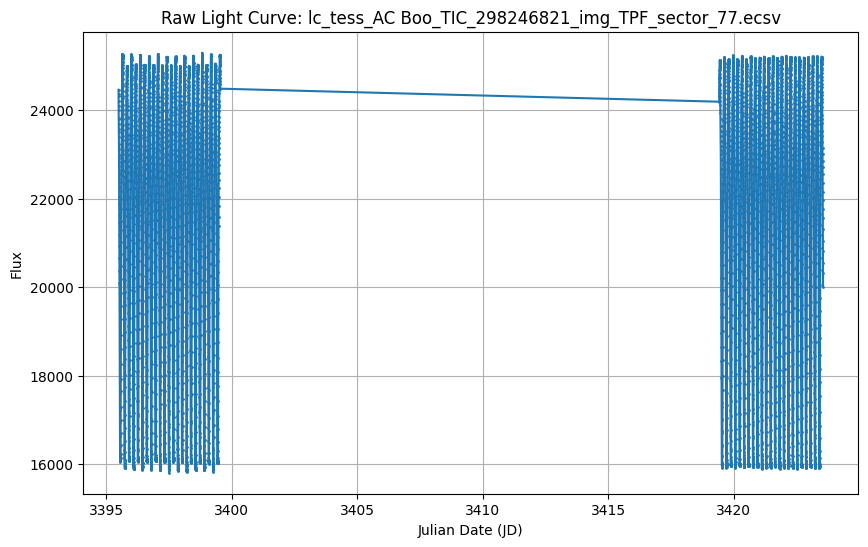

In [9]:
plot_lightcurve('../../tess_curves/lc_tess_AC Boo_TIC_298246821_img_TPF_sector_77.ecsv')

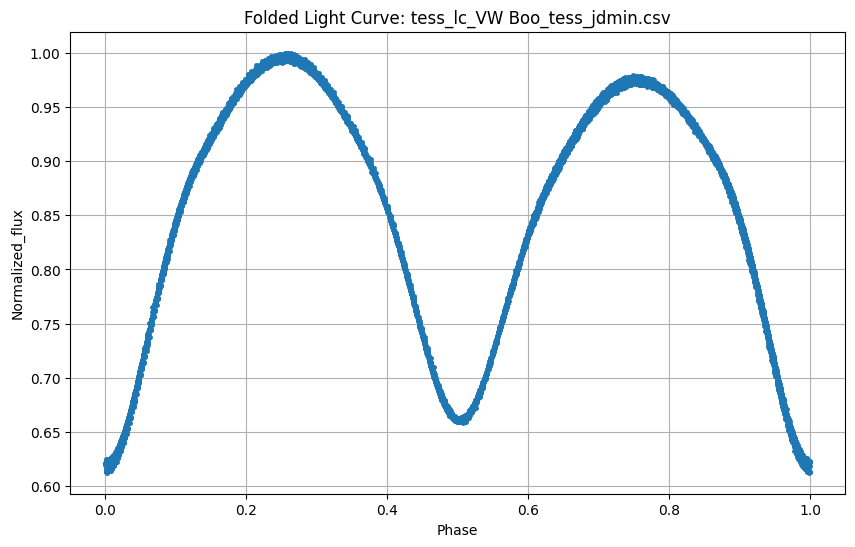

In [16]:
plot_lightcurve('../tess_lc_VW Boo_tess_jdmin.csv')